# CS/CE 457/464 - Homework Assignment 8: Clustering

## Name: Muhammad Areeb Kazmi
## Email ID: mk07202@st.habib.edu.pk

In [7]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Reading data from csv file into dataframe
df = pd.read_csv('baskin_robbins_icecream.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [9]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


## Question 1
Need to clean the data. Remove columns Flavour and Category for clustering
purpose.

In [10]:
# Cleaning the data by dropping columns category, flavour

df.drop(['Flavour','Category'],axis=1,inplace=True)
df.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


## Question 2
Scale (normalize) the data before clustering.

In [11]:
#scaling values before clustering

scaler = MinMaxScaler()
df_s = scaler.fit_transform(df)
df_s[1:5]

array([[0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

## Question 3
Generate WSS (Knee Plot) to find optimal number of clusters. You can also plot
Silhouette Coefficient plot to support your answer.

In [13]:
wss = []
sil_score = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 100)
    kmeans.fit(df_s)
    wss.append(kmeans.inertia_)
    if i > 1:
        labels = kmeans.labels_
        sil_score.append(silhouette_score(df_s, labels))

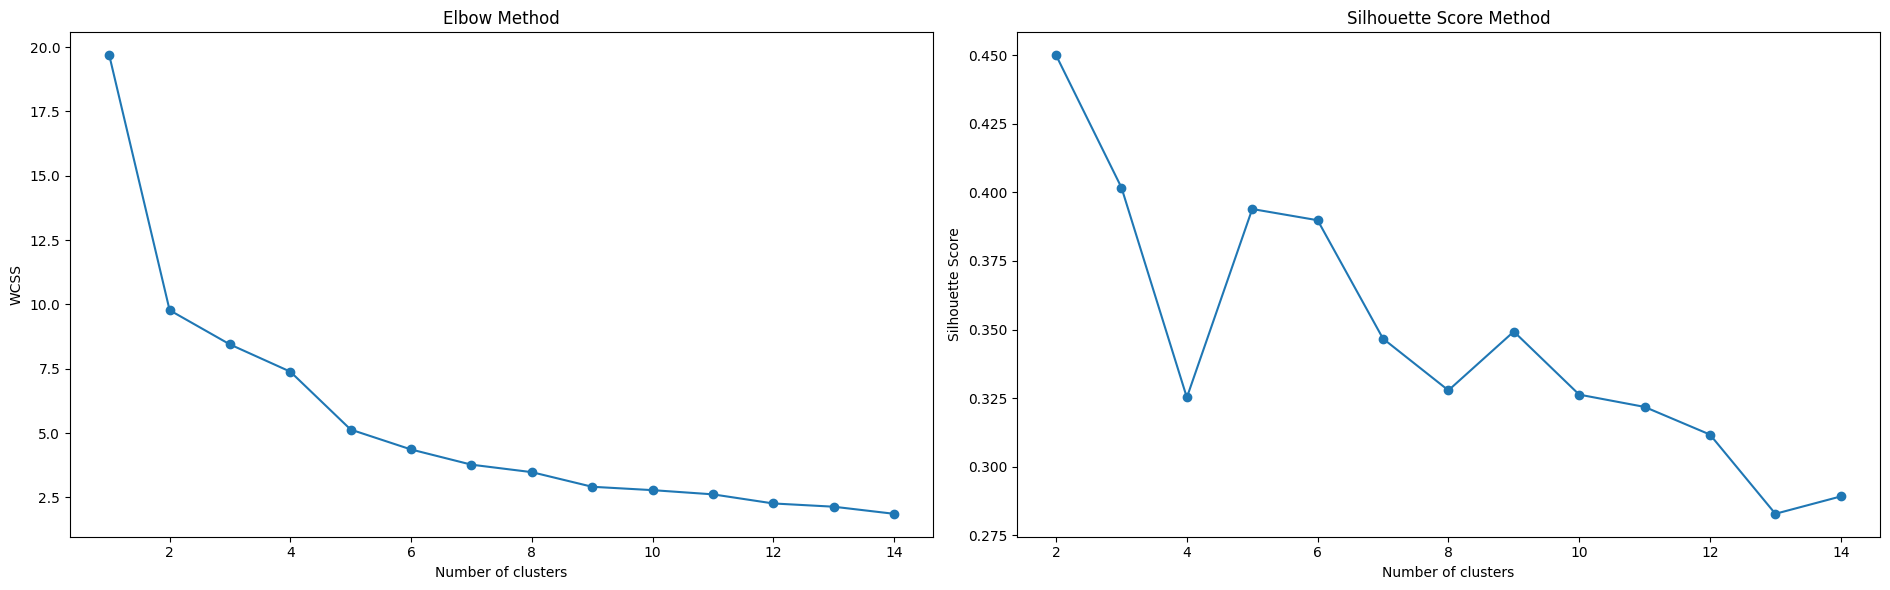

In [14]:
# Plotting WSS (Elbow Method)
plt.figure(figsize=(19, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 15), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), sil_score, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

**Observation:** From the elbow method graph and silhouette score graph, we can conclude that optimal number of clusters is 4.
In elbow method graph, we can see that the value become less drastically changing after reaching k = 4, so that is optimal value from this graph.
Moreover in silhoutte score graph, k= 5 has the coefficient value closest to 1,

Given the results from both methods, we can conclude that the
optimal number of clusters is likely 5. This is supported by the higher silhouette score at 5 clusters, indicating better-defined and distinct clusters.

## Question 4
Perform K-Means clustering again with optimal number of clusters.

In [50]:
# Performing clustering with optimal numbers of cluster
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 100)
result = kmeans.fit_predict(df_s)

result

array([2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 3, 3, 1, 2, 1, 2, 0, 2, 3, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 1, 3, 2, 3, 3, 2, 3, 2,
       2, 0, 2, 3, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 0, 1,
       0, 2, 2, 3], dtype=int32)

## Question 5
Visualize the clustering results.

Text(0.5, 1.0, 'The original dataset')

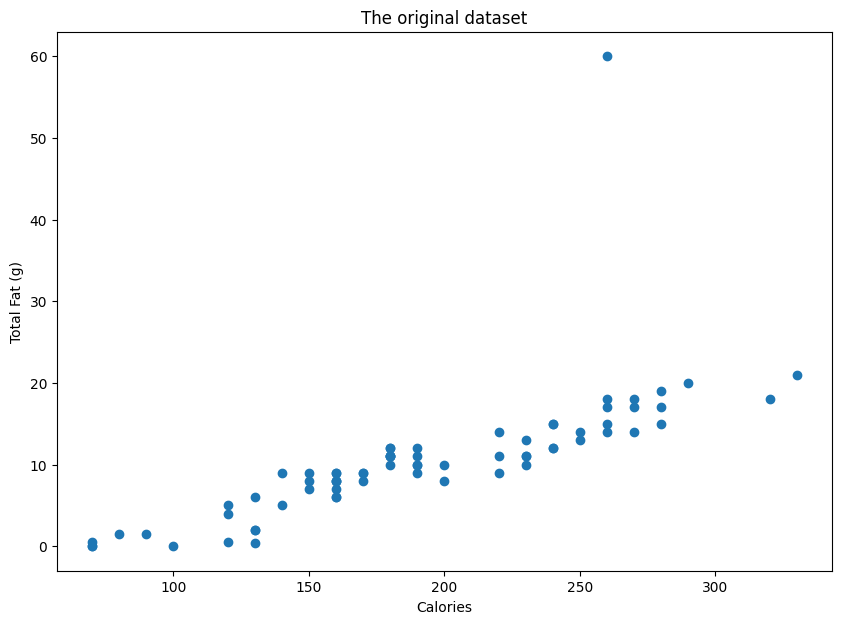

In [51]:
# Visualizing the clustering result

# Taking any two features for visualisation. x = calories y= cholestrol

plt.figure(figsize=(10,7))
plt.scatter(x=df['Calories'],y=df['Total Fat (g)'])
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.title("The original dataset")

**Observation:** The above scatter plot shows that there is a positive relation between the variables and there are also some outliers in the data. Overall, the data is well spread in a certain range. This plot uses the data before clustering

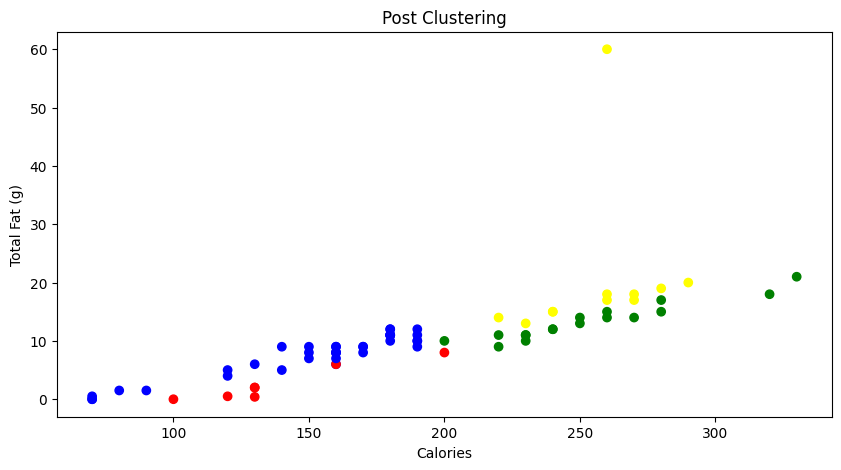

In [52]:
#Visualisation after clustering

plt.figure(figsize=(10,5))
colors = np.array(['red', 'green', 'blue', 'yellow'])
plt.scatter(x = df['Calories'], y = df['Total Fat (g)'], c=colors[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.title('Post Clustering')
plt.show()

Each cluster is represented by a different color: red, green, blue, and yellow.
For example, the red cluster could represent low-calorie, low-fat foods, while the yellow cluster might represent high-calorie, high-fat foods.

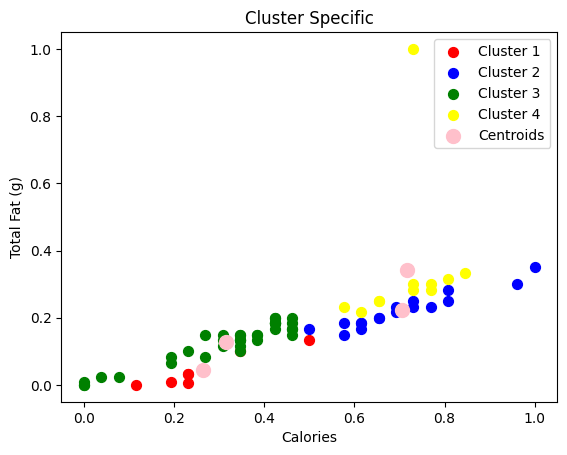

In [53]:
plt.scatter(df_s[result == 0, 0], df_s[result == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_s[result == 1, 0], df_s[result == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df_s[result == 2, 0], df_s[result == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(df_s[result == 3, 0], df_s[result == 3, 1], s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='pink', label='Centroids')
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.title('Cluster Specific')
plt.legend()
plt.show()

**Observation:** This plot shows that the our four clusters are well centered around a central node/center.

## Question 6
Use cluster labels to create cluster specific data frames from original dataset.

In [54]:
C1 = df.iloc[result == 0, :]
C2 = df.iloc[result == 1, :]
C3 = df.iloc[result == 2, :]
C4 = df.iloc[result == 3, :]

C1.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
4,130,2.0,0.1,26,20,2.0
8,200,8.0,0.2,38,7,5.0
17,100,0.0,0.0,25,18,0.0
45,160,6.0,0.2,30,8,5.0
50,130,2.0,0.1,27,20,1.0


In [55]:
C2.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
9,220,11.0,0.4,26,19,4.0
13,280,15.0,0.5,31,23,5.0
15,280,17.0,0.4,29,20,5.0
20,240,12.0,0.4,31,20,4.0
25,240,12.0,0.4,30,23,4.0


In [56]:
C3.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
5,150,8.0,0.3,18,14,3.0


In [57]:
C4.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
11,230,13.0,0.4,25,18,5.0
12,240,15.0,0.5,23,18,5.0
19,270,17.0,0.4,25,18,5.0
35,260,17.0,0.4,22,17,5.0
37,240,15.0,0.5,23,18,5.0


## Question 7
Generate at least 3 insights from your clustering results to show unique and
interesting features for each cluster. Discuss your findings.

In [58]:
C1.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,138.571429,2.700000,0.085714,28.285714,16.142857,2.728571
std,32.366944,3.092464,0.089974,4.608481,5.956189,2.546052
min,100.000000,0.000000,0.000000,25.000000,7.000000,0.000000
25%,125.000000,0.450000,0.000000,25.500000,13.000000,0.550000
50%,130.000000,2.000000,0.100000,27.000000,20.000000,2.000000
75%,145.000000,4.000000,0.150000,28.500000,20.000000,5.000000
max,200.000000,8.000000,0.200000,38.000000,20.000000,6.000000


<Axes: >

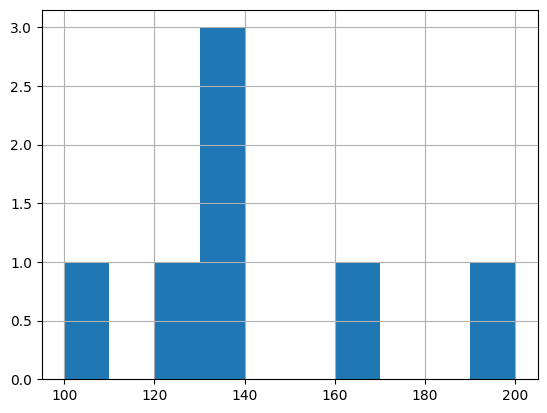

In [60]:
C1['Calories'].hist()

<Axes: >

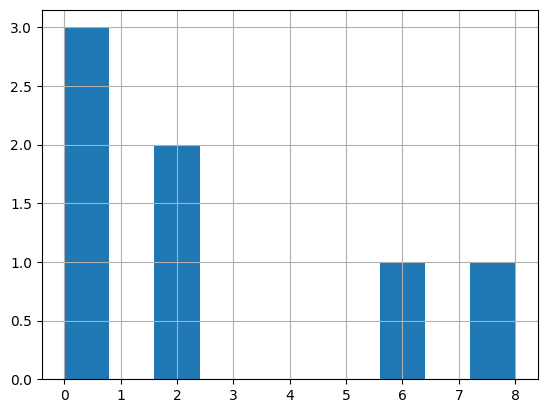

In [61]:
C1['Total Fat (g)'].hist()

<Axes: >

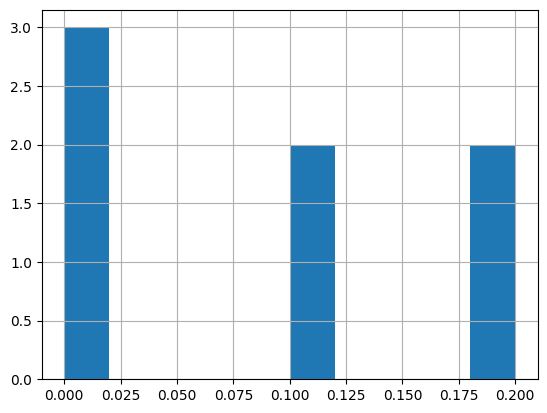

In [62]:
C1['Trans Fat (g)'].hist()

Cluster 1 presents a glimpse into a collection of food items characterized by their nutritional moderation. With an average calorie count around 138, these items strike a balance between energy provision and caloric , making them a potentially ideal choice for those mindful of their daily intake. The fat content, particularly noteworthy at only about 2.7g, suggests a number of options that could be friendly to heart health without compromising on taste. Trans Fat, averaging a modest 0.08g per serving, align with the cluster's theme of moderation, possibly indicating a selection of items that are more conducive to maintaining healthy cholesterol levels.
This cluster might be the go-to category for health-conscious consumers who seek a diet that supports a balanced lifestyle without the extreme restriction for healthy diet

In [59]:
C2.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,253.529412,13.352941,0.388235,29.529412,22.588235,4.647059
std,34.630401,3.180825,0.060025,2.527787,2.450990,1.057188
min,200.000000,9.000000,0.200000,24.000000,19.000000,4.000000
25%,230.000000,11.000000,0.400000,29.000000,20.000000,4.000000
50%,250.000000,13.000000,0.400000,30.000000,23.000000,4.000000
75%,270.000000,15.000000,0.400000,30.000000,24.000000,5.000000
max,330.000000,21.000000,0.500000,36.000000,28.000000,8.000000


<Axes: >

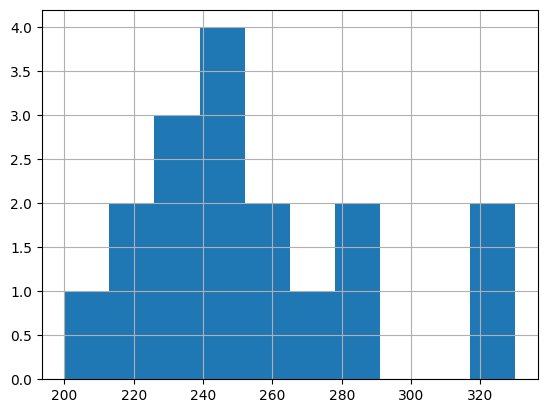

In [64]:
C2['Calories'].hist()

<Axes: >

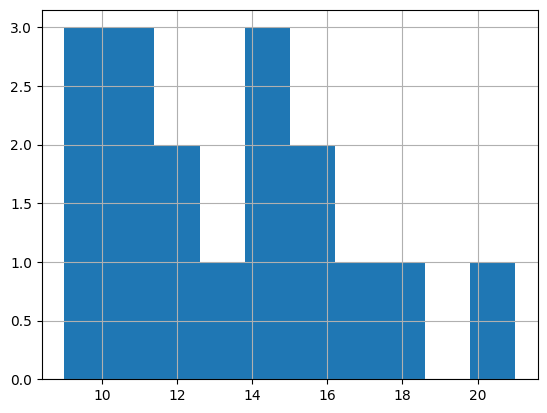

In [65]:
C2['Total Fat (g)'].hist()

<Axes: >

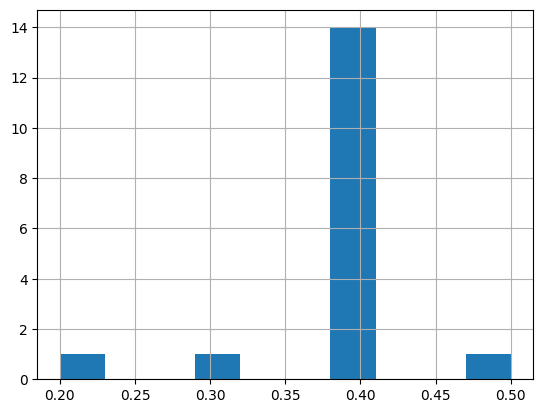

In [66]:
C2['Trans Fat (g)'].hist()

**Observation for Cluster 2:** Cluster 2 presents a glimpse into a collection of food items characterized by their lack of nutritional moderation. With an average calorie count around 252, these items are high in calories, making them a potentially ideal choice for high energy in takes. The fat content, particularly noteworthy at only about 13.8g, suggests a number of options that could be hazardous to heart health. Trans Fat, averaging a whopping 0.4g per serving, align with the cluster's theme of high energy intakes, possibly indicating a selection of items that are more towards high energy intakes with fats.
This cluster might be the go-to category for fat consuming consumers who seek a diet that supports a high energy diet without any restrictions.

In [67]:
C3.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,152.000000,7.642857,0.211429,18.628571,14.257143,2.617143
std,36.846262,3.515870,0.113167,2.402030,2.852686,1.022248
min,70.000000,0.000000,0.000000,13.000000,4.000000,0.000000
25%,140.000000,6.000000,0.200000,17.000000,13.000000,2.000000
50%,160.000000,9.000000,0.200000,18.000000,14.000000,3.000000
75%,180.000000,10.000000,0.300000,21.000000,16.000000,3.000000
max,190.000000,12.000000,0.400000,24.000000,20.000000,4.000000


<Axes: >

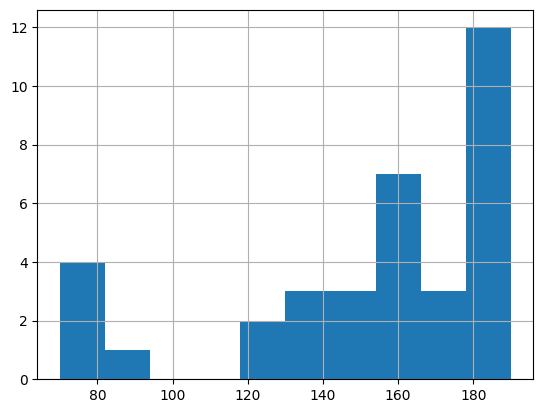

In [68]:
C3['Calories'].hist()

<Axes: >

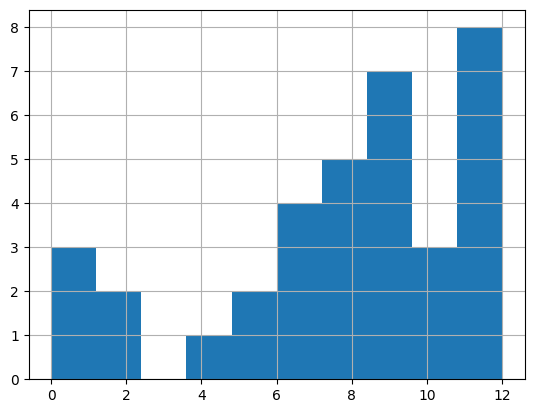

In [69]:
C3['Total Fat (g)'].hist()

<Axes: >

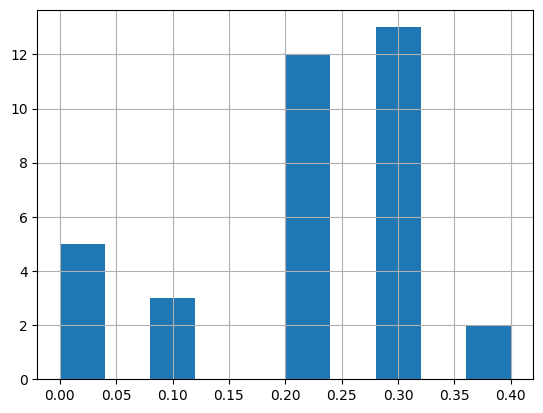

In [70]:
C3['Trans Fat (g)'].hist()

**Observation for Cluster 3:** Cluster 3 presents a glimpse into a collection of food items characterized by their nutritional moderation ut with higher fats. With an average calorie count around 150, these items are high in calories, making them a potentially ideal choice for high energy in takes. The fat content, particularly noteworthy at only about 7.6g, suggests a number of options that could be hazardous to heart health. Trans Fat, averaging at about 0.2g per serving, align with the cluster's theme of high energy intakes, possibly indicating a selection of items that are more towards moderate energy with higher fat.
This cluster might be the go-to category for moderate energy consuming consumers who seek a diet that does not take fat amount in consciousness.

In [71]:
C4.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,256.363636,20.545455,0.436364,22.818182,17.090909,5.454545
std,21.574396,13.261702,0.050452,1.887760,1.044466,0.820200
min,220.000000,13.000000,0.400000,20.000000,15.000000,5.000000
25%,240.000000,15.000000,0.400000,21.500000,16.500000,5.000000
50%,260.000000,17.000000,0.400000,23.000000,17.000000,5.000000
75%,270.000000,18.500000,0.500000,24.500000,18.000000,5.500000
max,290.000000,60.000000,0.500000,25.000000,18.000000,7.000000


<Axes: >

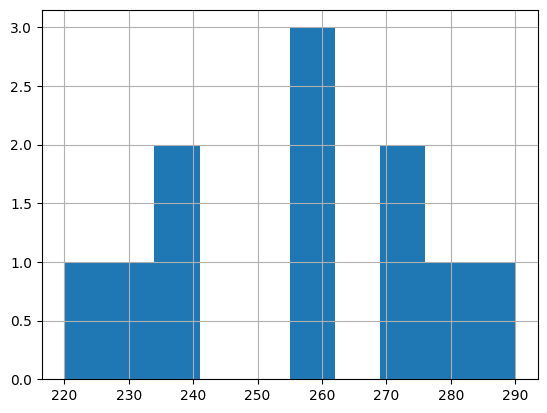

In [72]:
C4['Calories'].hist()

<Axes: >

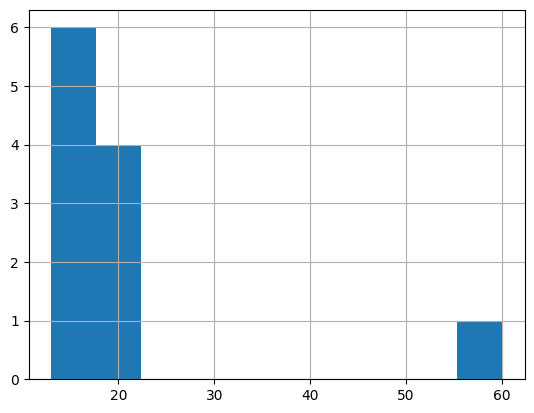

In [73]:
C4['Total Fat (g)'].hist()

<Axes: >

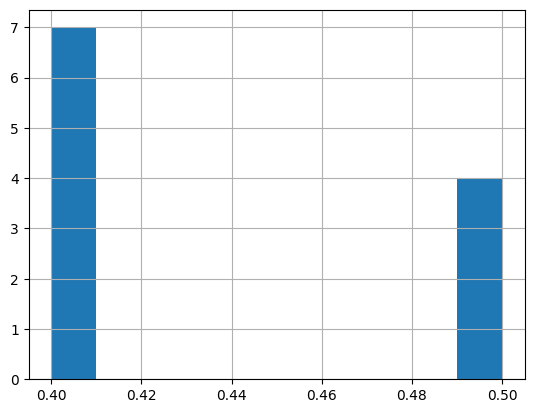

In [74]:
C4['Trans Fat (g)'].hist()

**Observation for Cluster 4:** Cluster 4 presents a glimpse into a collection of food items characterized by their lack ofnutritional moderation ut with higher fats. With an average calorie count around 256, these items are high in calories, making them a potentially ideal choice for high energy in takes. The fat content, particularly noteworthy at only about 20.5g, suggests a number of options that could be hazardous to heart health. Trans Fat, averaging at about 0.43g per serving, align with the cluster's theme of high energy intakes, possibly indicating a selection of items that are more towards high energy with higher fat.
This cluster might be the go-to category for moderate energy consuming consumers who seek a diet that does not take fat amount in consciousness. Also this category consumes the highest fat content

## Question 8
Can you suggest a unique name for each cluster? For example if a cluster is showing
high Sugar level, then you can call it a “SugarLovers” cluster.

### Cluster 1: Health Conscious Servings
These consumers are health conscious and take low fat intakehese

### Cluster 2: High Energy Servings
These servings are high in energy along with fat intakes

### Cluster 3: Low energy cheese lovers
These servings are high in fat content, but are low in calories

### Cluster 4: Cheese Lovers Energy Servings
These servings are very high in fat and have higher calorie content.